In [68]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [69]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [70]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [71]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [72]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [73]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [74]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [75]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [76]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [77]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [78]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [79]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [80]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [81]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [82]:
#get abundances of all elements in a single array
allElementAbundances=np.hstack([regularElementalAbundances,nuclearElementalAbundances])

In [83]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [84]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [85]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [86]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [87]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [88]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5
noOfYticks=5

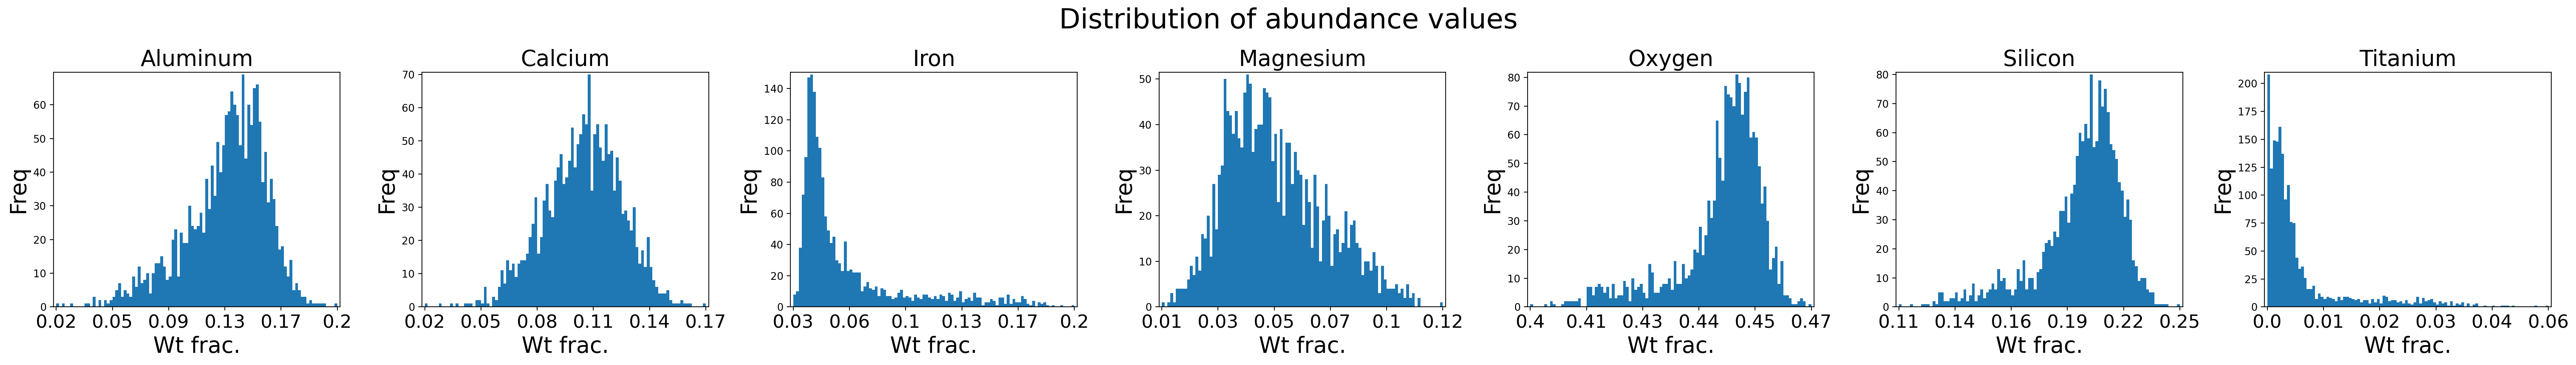

In [89]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

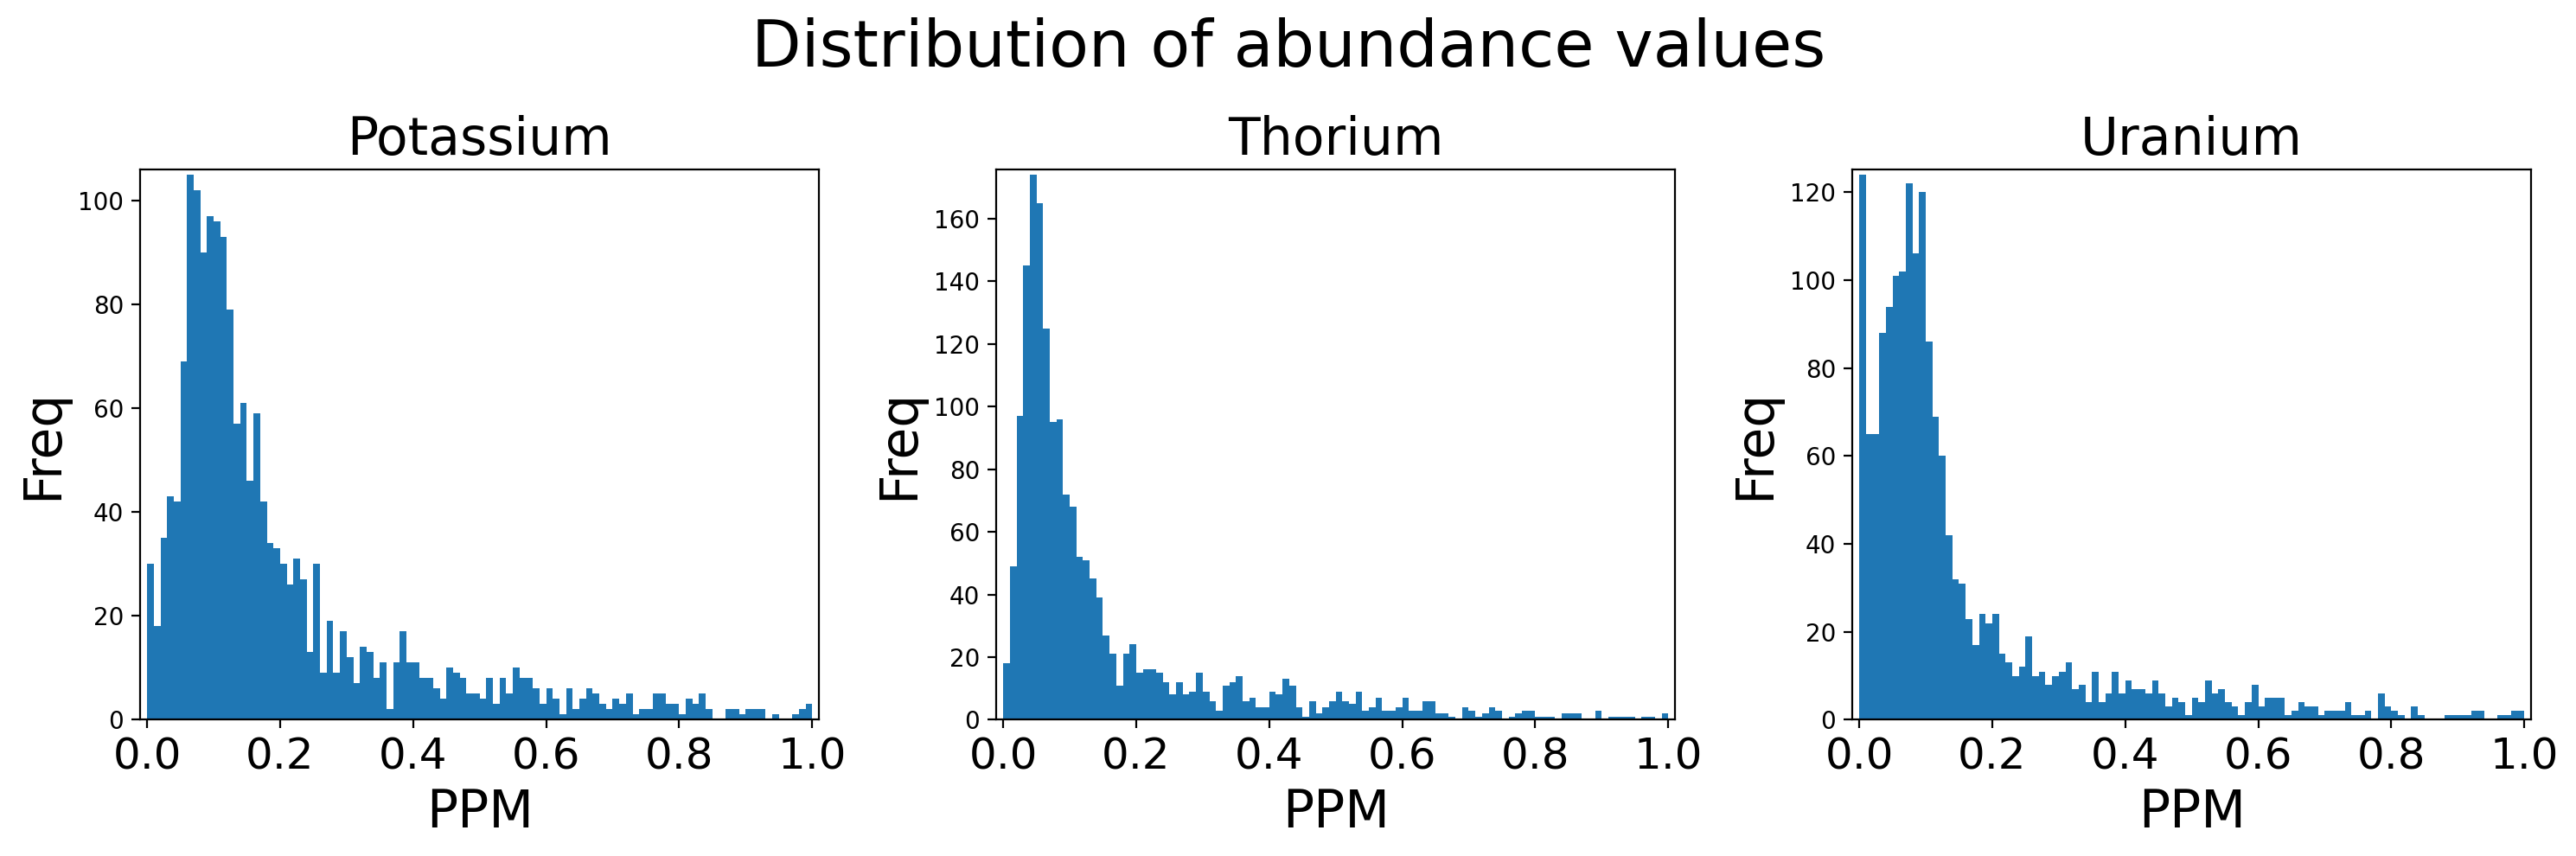

In [90]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

In [91]:
#delete the spectra
del preprocessedSpectra

In [92]:
#import the function to calculate spearman's rank correlation from scipy
from scipy.stats import spearmanr

In [94]:
#create an array to hold spearman corellation values
spearmeanCorr=np.ones((len(allElementNames),len(allElementNames)))
pearsonsCorr=np.ones((len(allElementNames),len(allElementNames)))

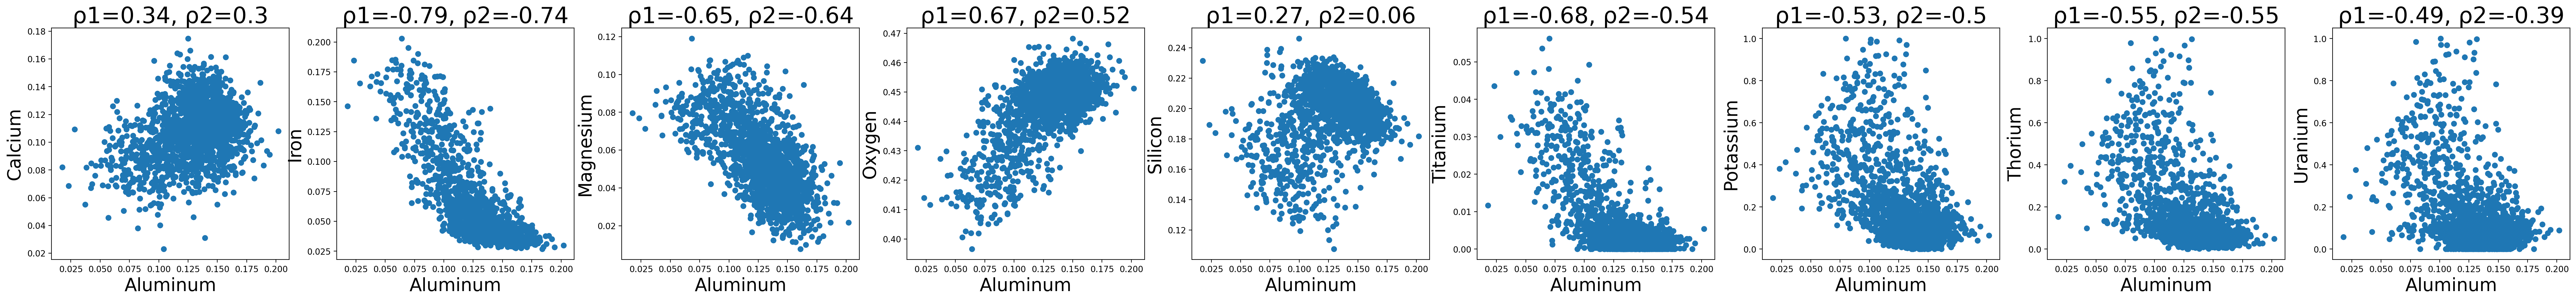

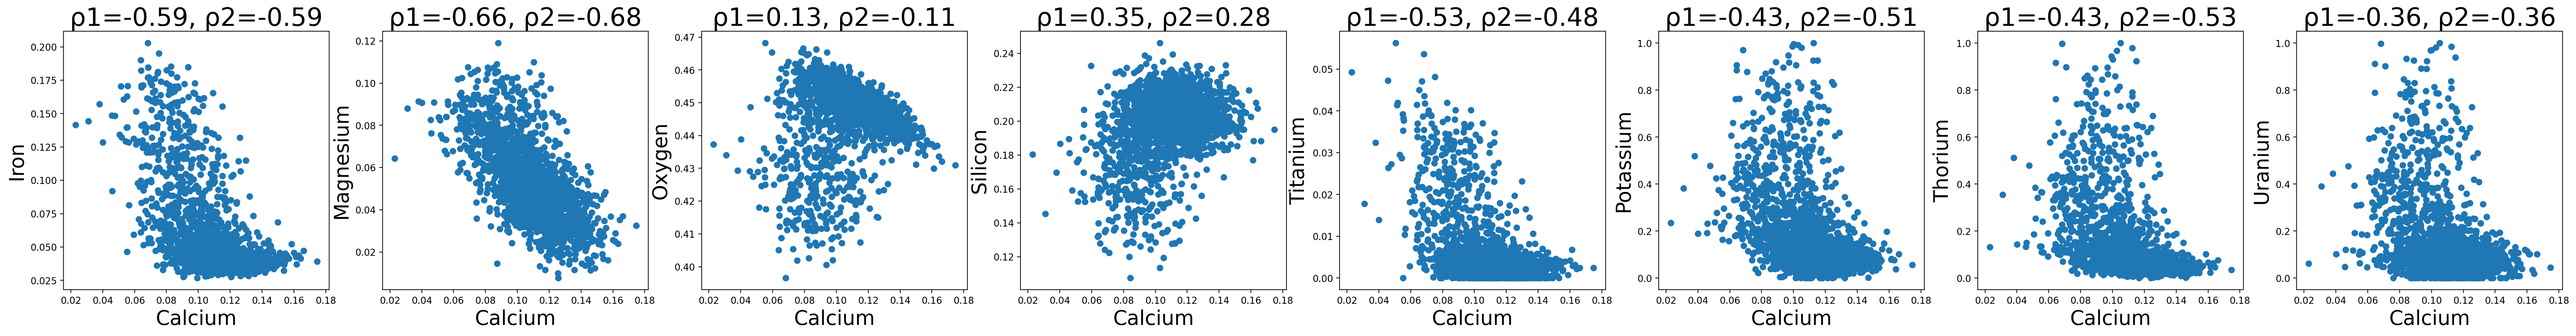

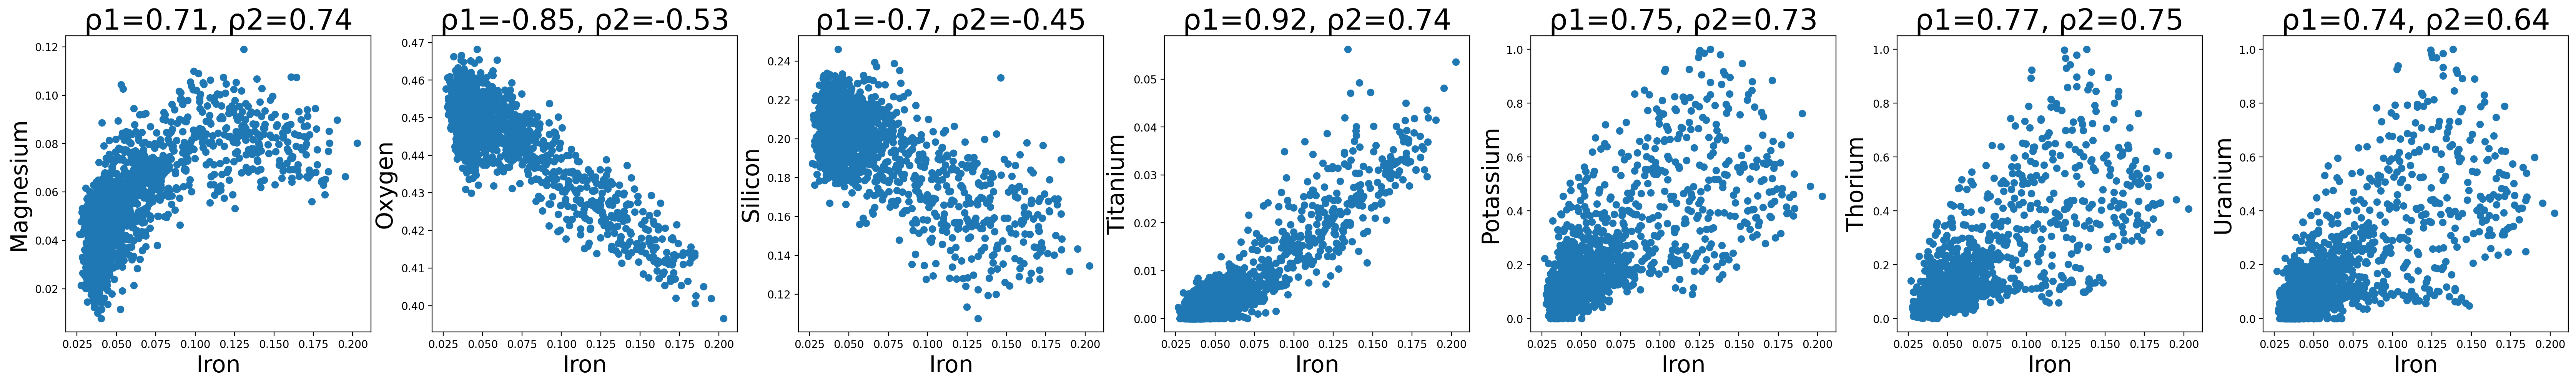

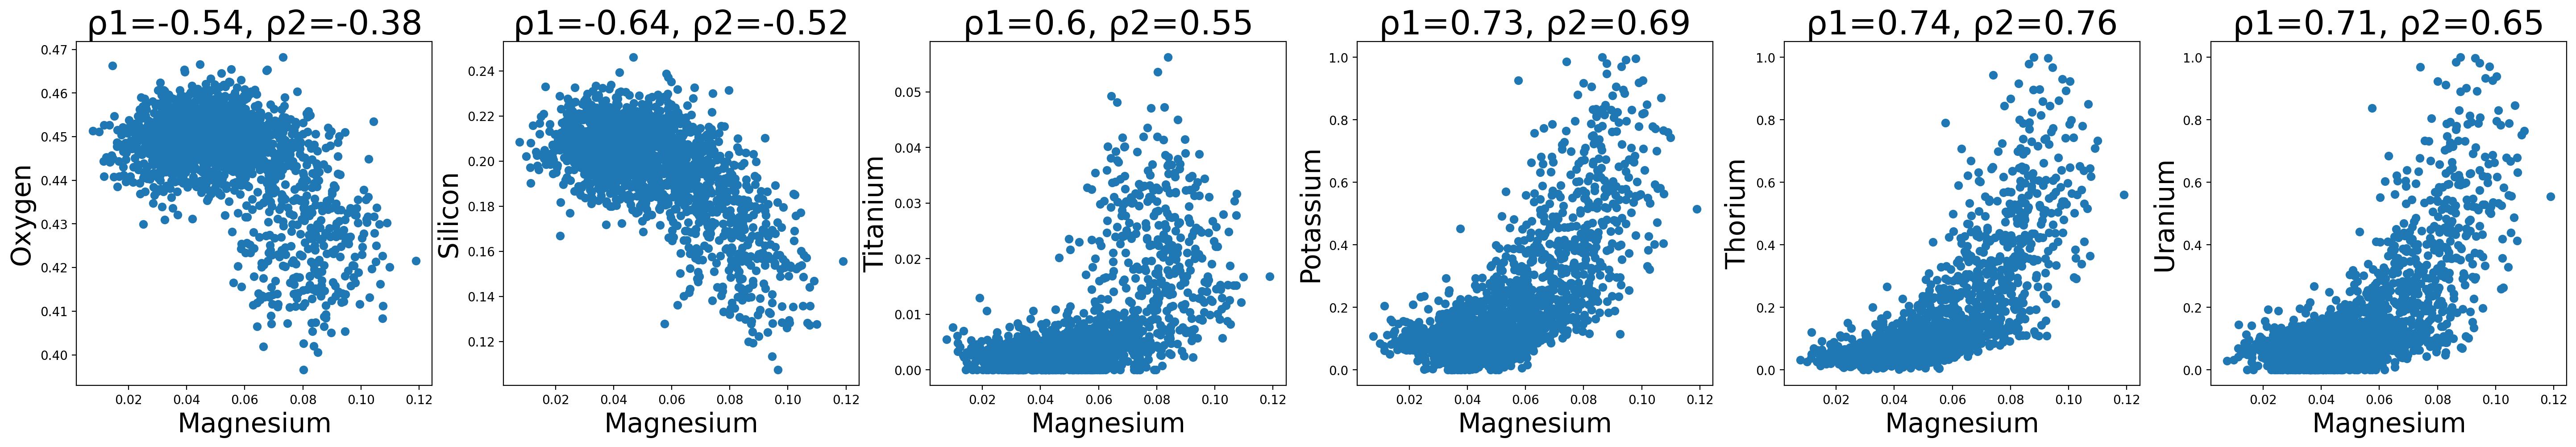

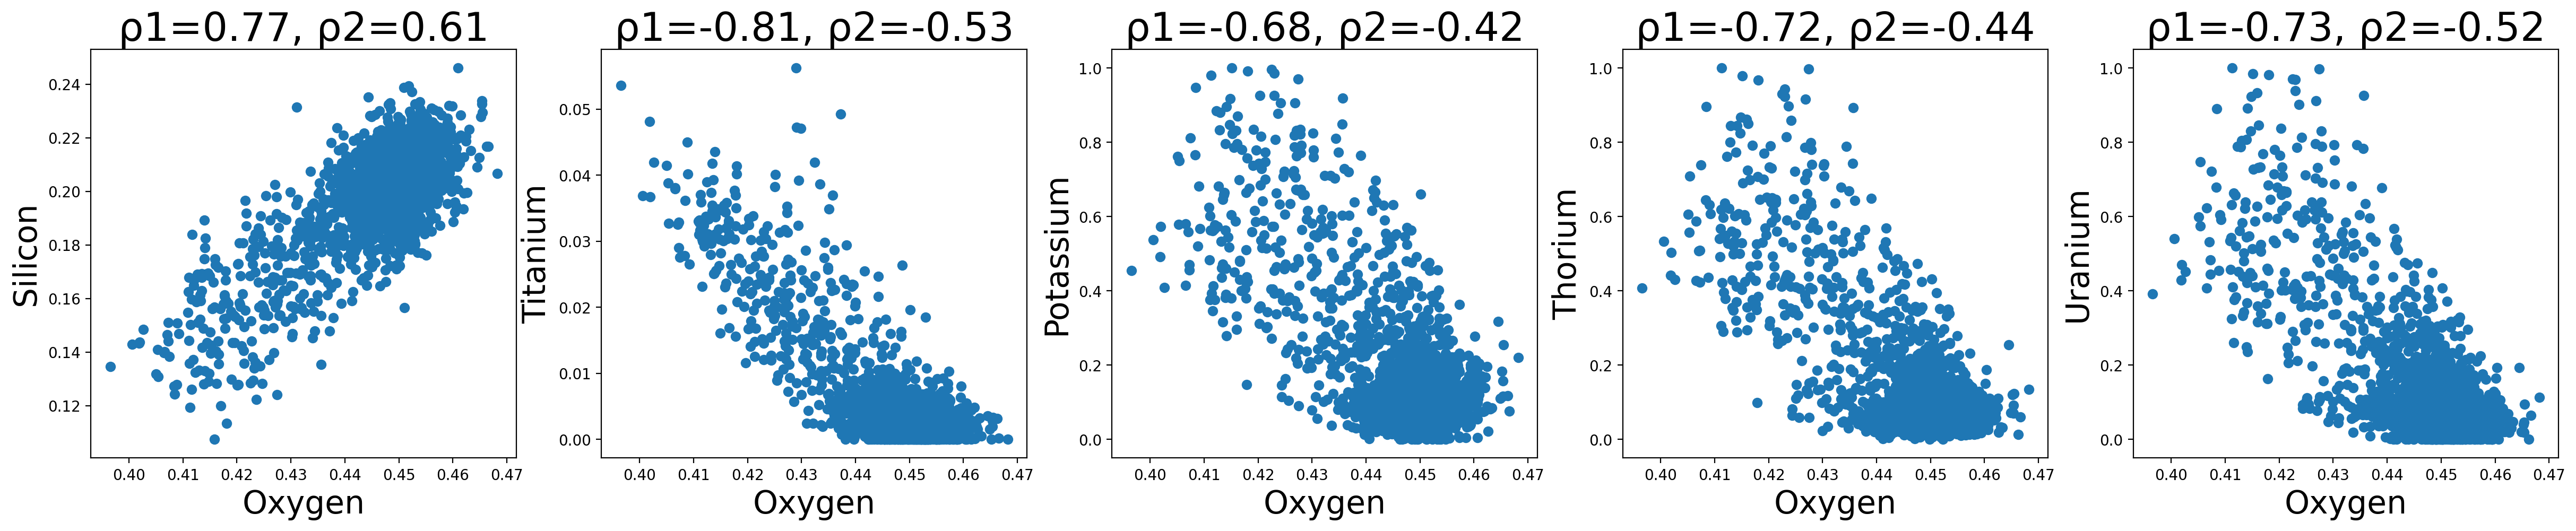

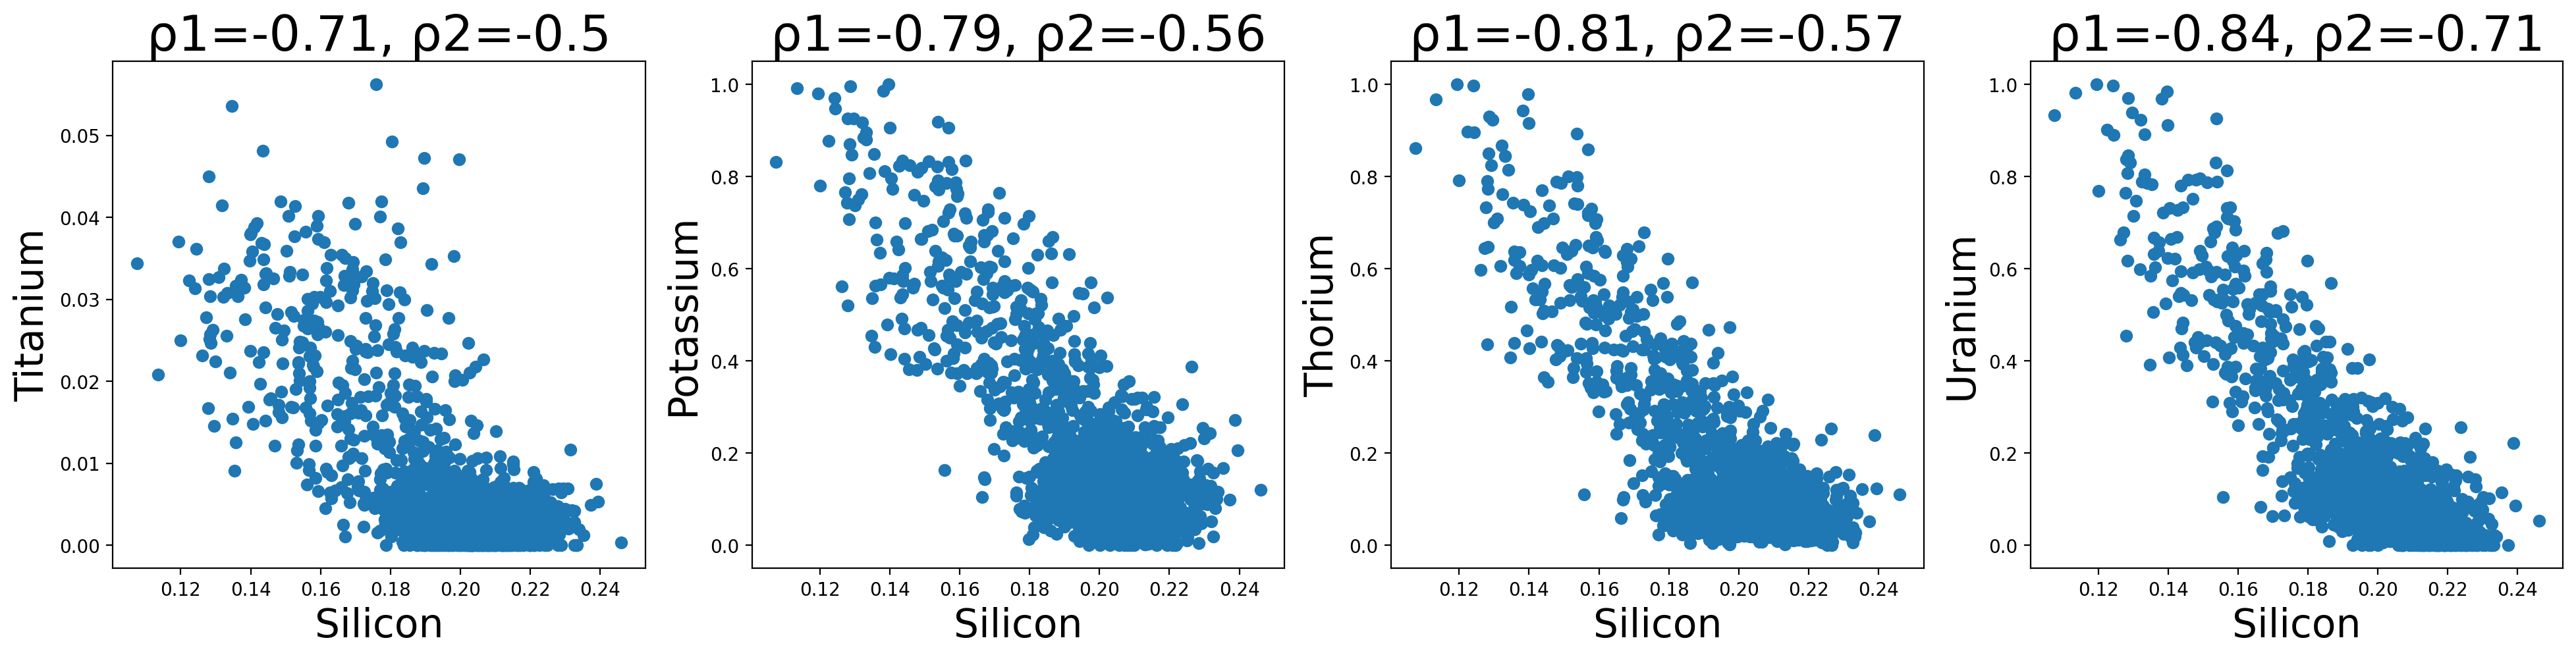

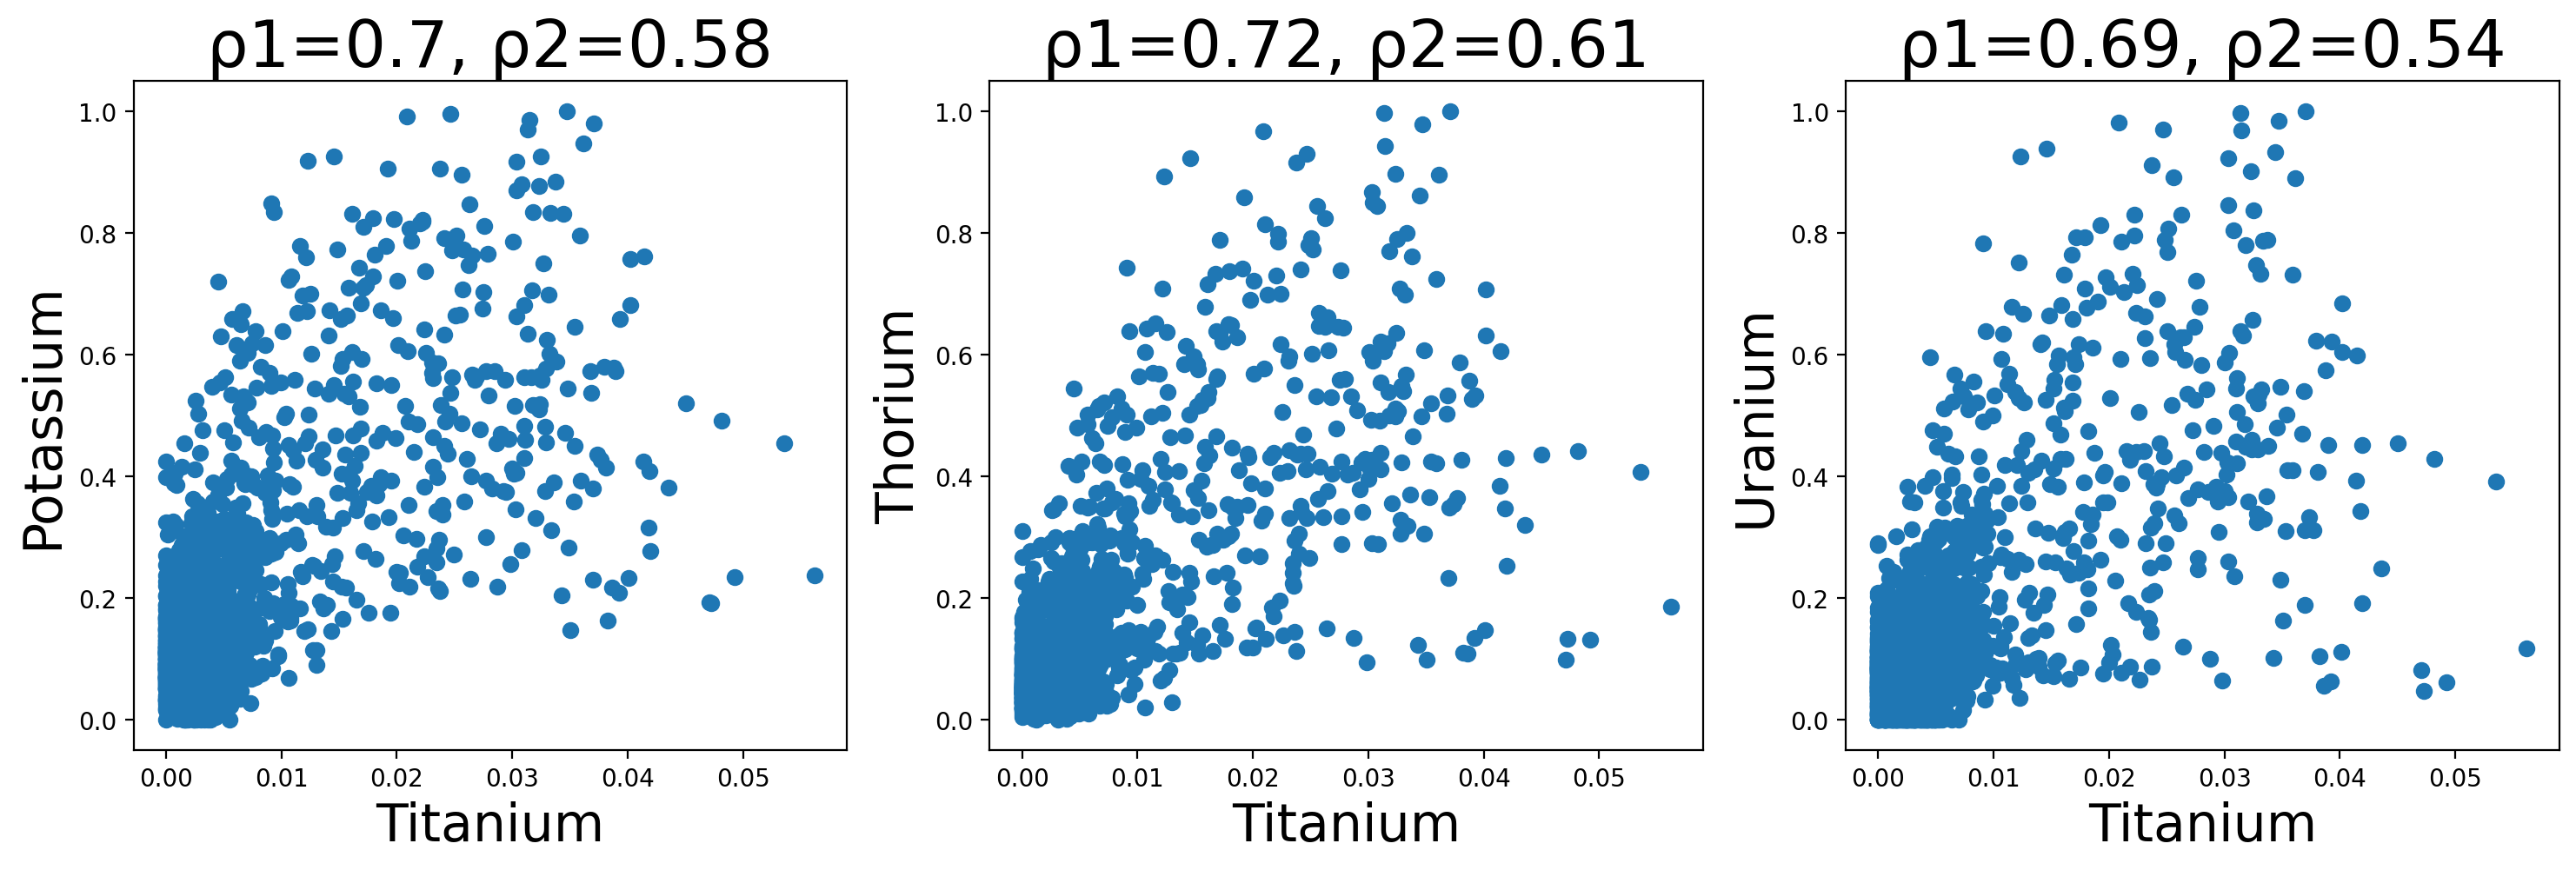

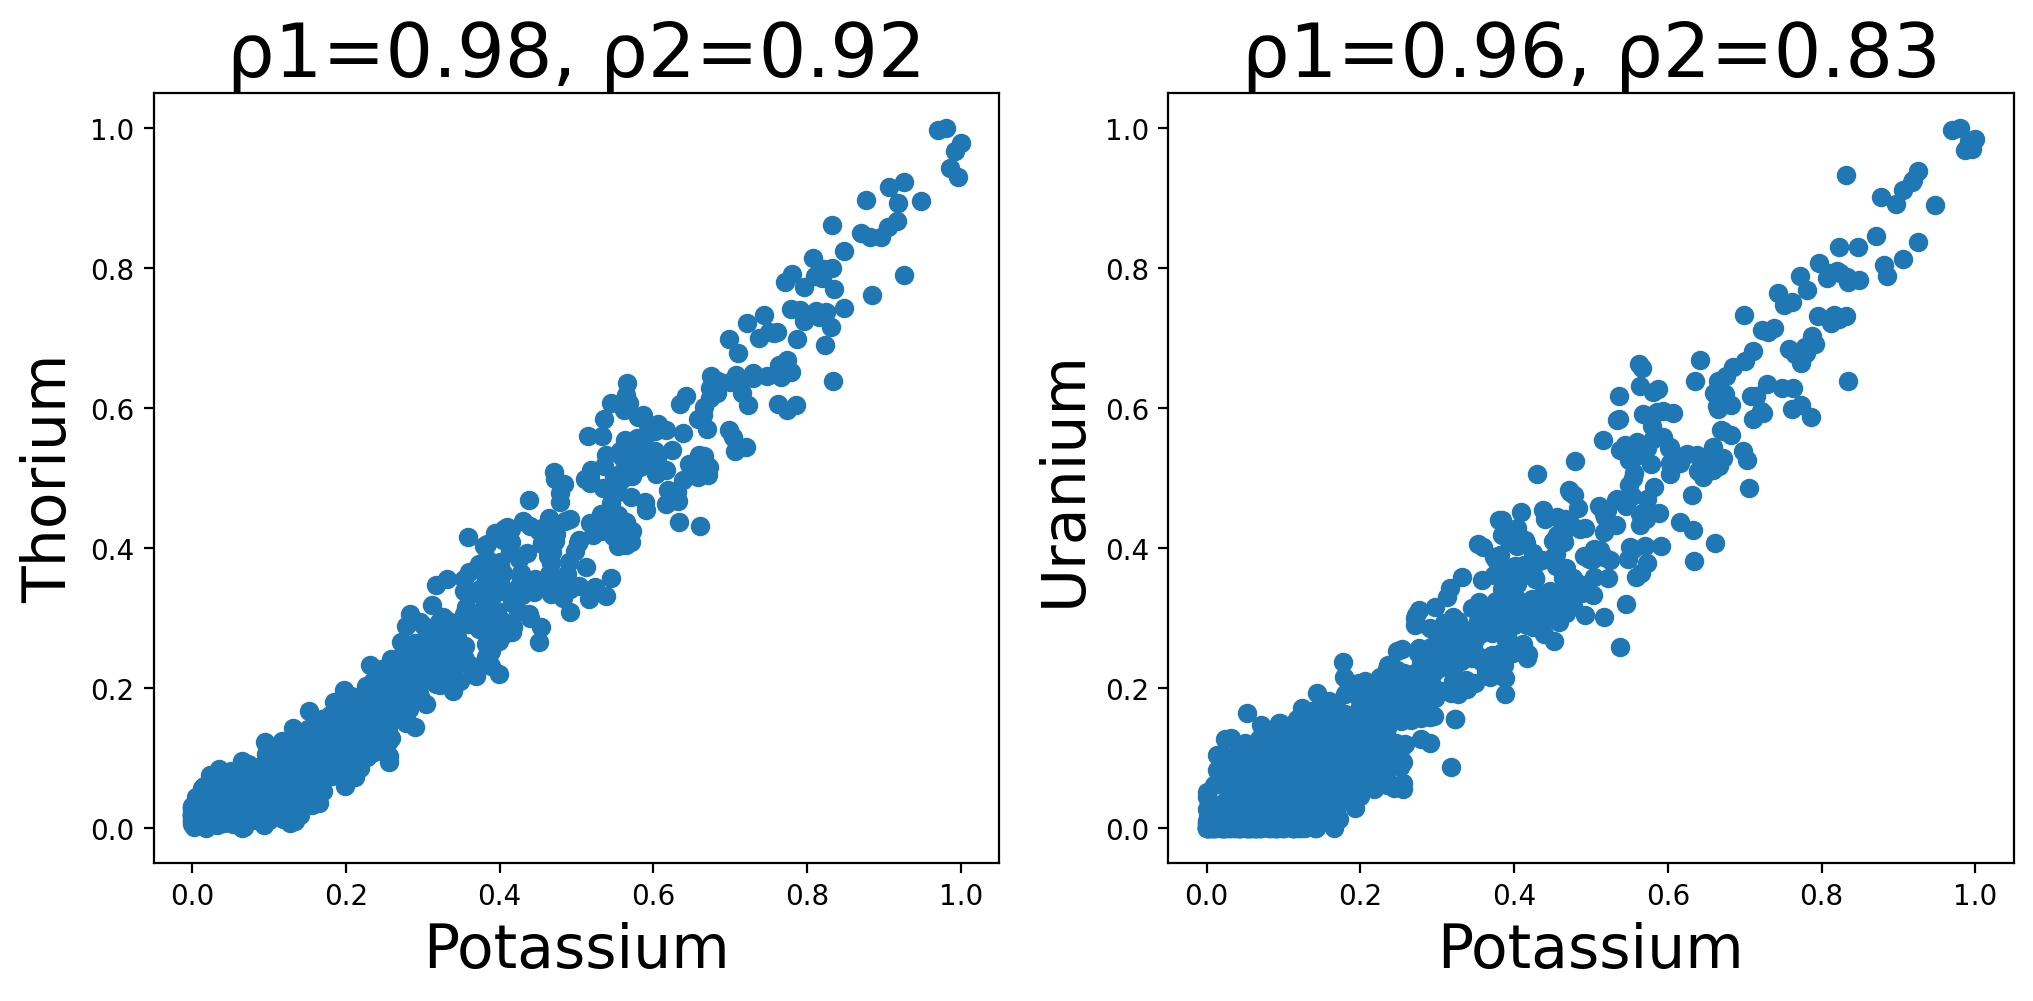

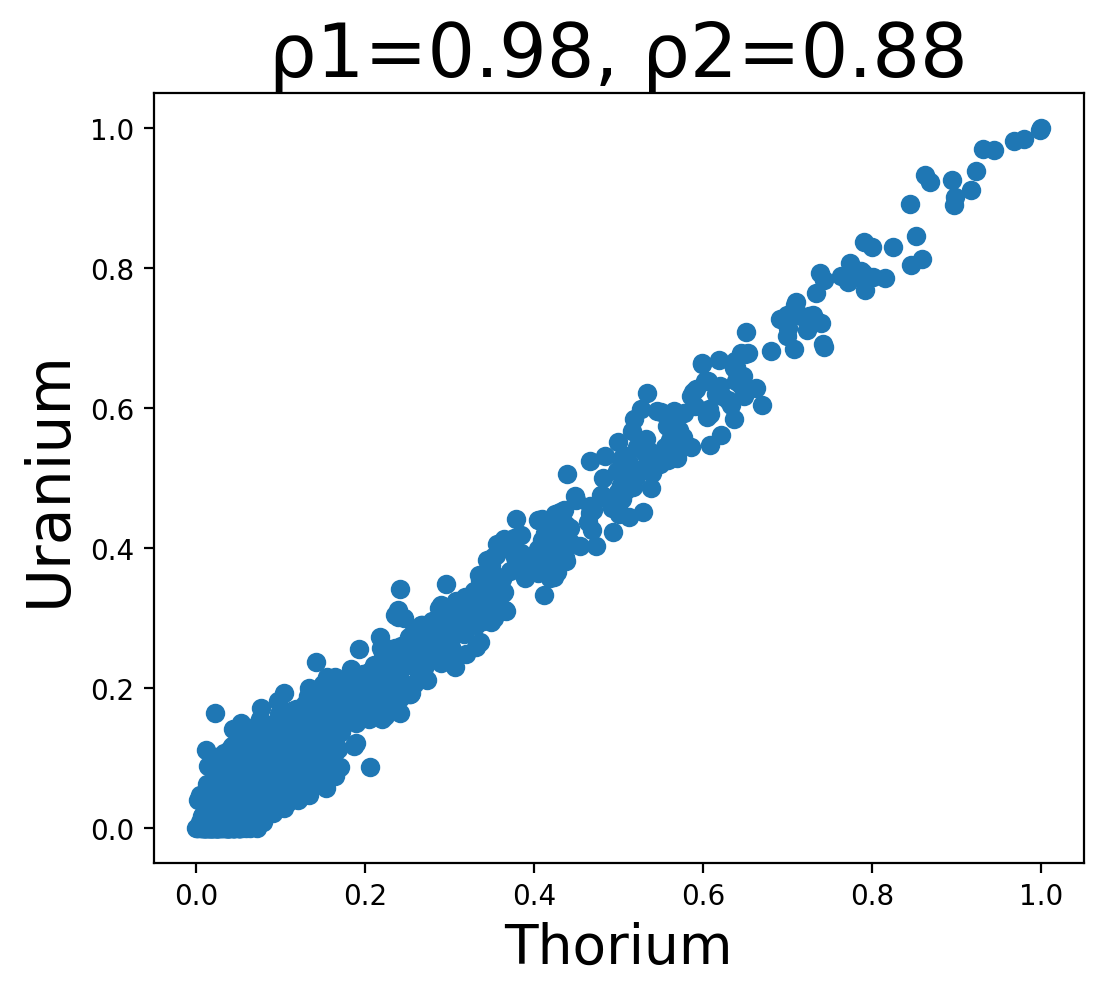

In [95]:
#iterate through all the elements
for i in range(len(allElementNames)-1):
    #get the name of current element
    currentElementName=allElementNames[i]
    #get the abundances for the current element
    currentElementAbundances=allElementAbundances[:,i]
    #get the number of combinations to be evaluated
    noOfCombinations=len(allElementNames)-(i+1)
    #create a figure
    figure,axes=plt.subplots(nrows=1,
                             ncols=noOfCombinations,
                             figsize=(6*noOfCombinations,5),
                             dpi=200,
                             sharex=True)
    #iterate through the other variables
    for j in range(i+1,len(allElementNames)):
        #get the name of conjugate element
        conjugateElementName=allElementNames[j]
        #get the abundances for the current element
        conjugateElementAbundances=allElementAbundances[:,j]
        #compute the correlation and P-value
        correlationValue=spearmanr(currentElementAbundances,conjugateElementAbundances)
        #get the p-value and correlation seperately
        pValue=correlationValue.pvalue
        correlationValue=correlationValue.statistic
        #compute pearsons correlation
        pearsons=np.corrcoef(currentElementAbundances,conjugateElementAbundances)[0,1]
        #get legend for the scatter plot
        currentPlotLegend="ρ1="+str(round(pearsons,2))+", ρ2="+str(round(correlationValue,2))
        #save the corrlation values
        pearsonsCorr[i,j]=pearsons
        spearmeanCorr[i,j]=correlationValue
        pearsonsCorr[j,i]=pearsons
        spearmeanCorr[j,i]=correlationValue
        #generate the scatter-plot
        try:
            axes[j-(i+1)].scatter(currentElementAbundances,
                                  conjugateElementAbundances)
        
            #set the axis labels
            axes[j-(i+1)].set_xlabel(currentElementName,
                                     fontsize=baseFontSize*1.2)
            axes[j-(i+1)].set_ylabel(conjugateElementName,
                                     fontsize=baseFontSize*1.2)
            #add Correlation values as title
            axes[j-(i+1)].set_title(currentPlotLegend,
                                    fontsize=baseFontSize*1.5)
        except:
            axes.scatter(currentElementAbundances,
                         conjugateElementAbundances)
            
            #set the axis labels
            axes.set_xlabel(currentElementName,
                            fontsize=baseFontSize*1.1)
            axes.set_ylabel(conjugateElementName,
                            fontsize=baseFontSize*1.2)
            #add Correlation values as title
            axes.set_title(currentPlotLegend,
                           fontsize=baseFontSize*1.5)

In [96]:
#import seaborn
import seaborn as sns

Text(408.22222222222223, 0.5, 'Elements')

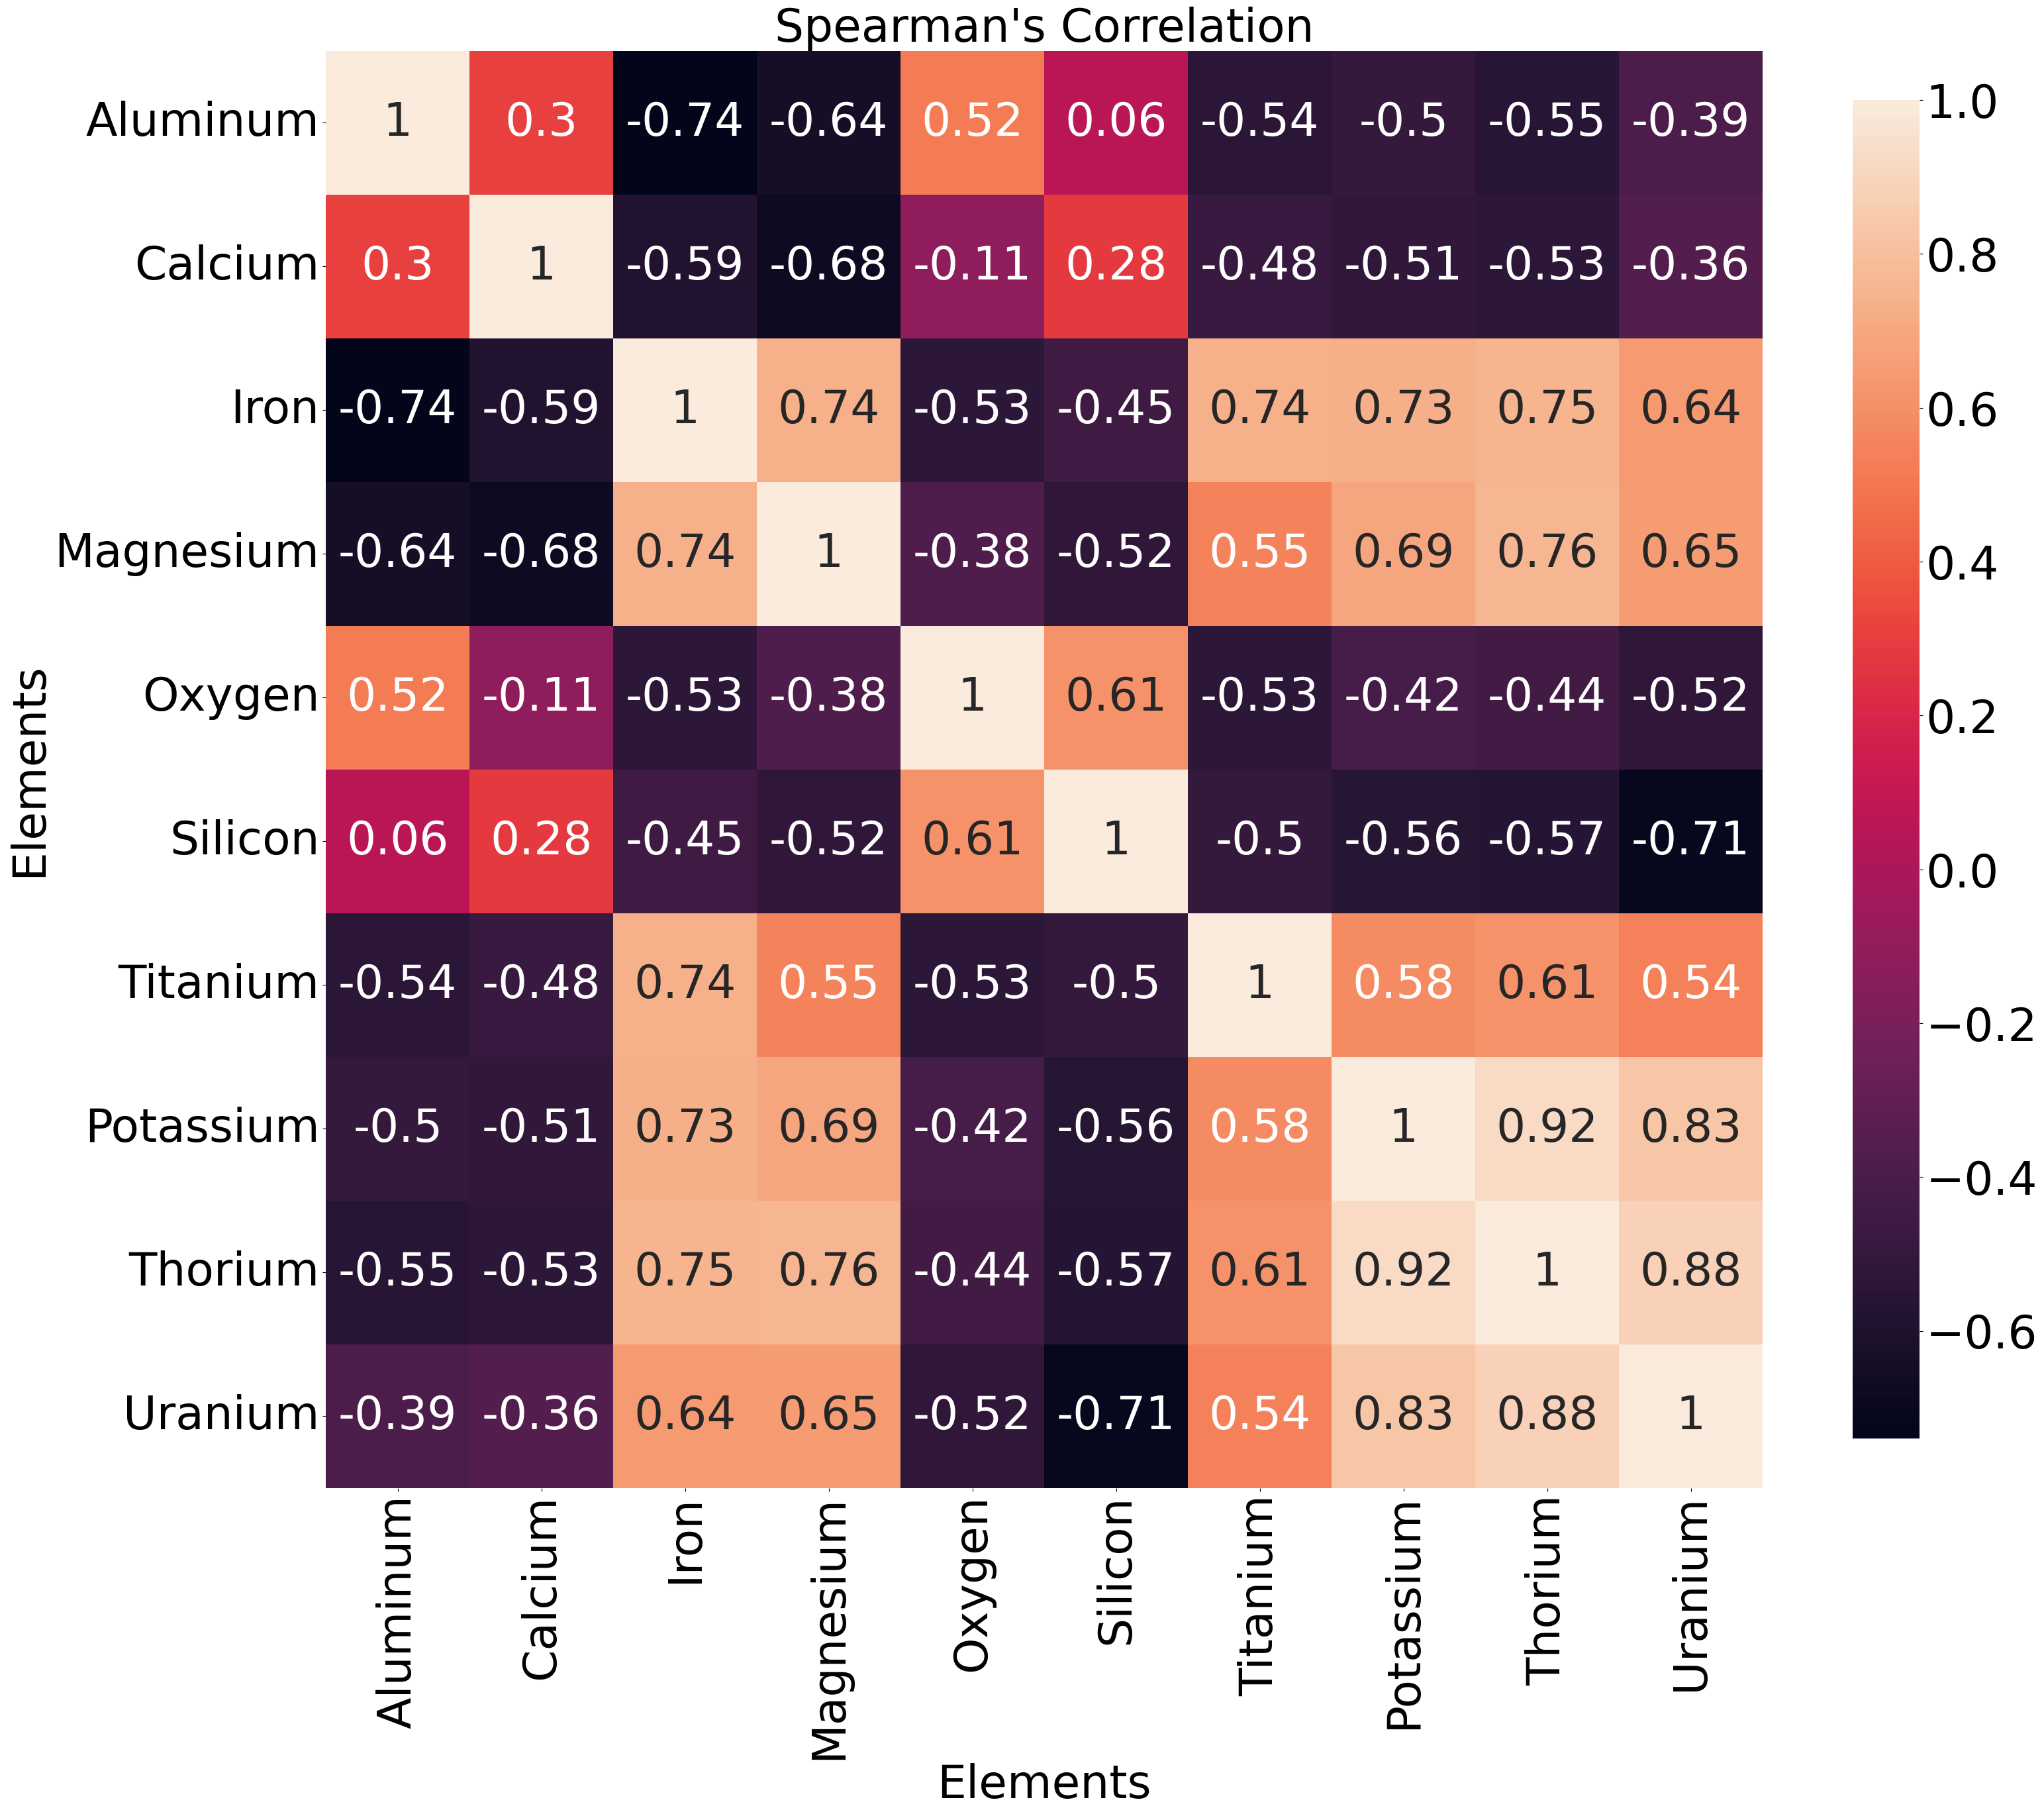

In [97]:
#import seaborn and pyplot
import seaborn as sns
import matplotlib.pyplot as plt

#create and annotate the figure
figure,axis=plt.subplots(figsize=(35,35))
axis.set_title("Spearman's Correlation",fontsize=50)
#create a list of ticks for the color bar
tickPositions=np.arange(-1,1.1,0.2)
#plot the similarity matrix rounded to two decimal places
heatmap=sns.heatmap(np.round(spearmeanCorr,2),
                    square=True,
                    annot=True,
                    xticklabels=allElementNames,
                    yticklabels=allElementNames,
                    annot_kws={"fontsize":50},
                    cbar_kws={"shrink":0.75,
                              "ticks":tickPositions})
#change the fontsize of the tick labels
temp=heatmap.set_yticklabels(heatmap.get_yticklabels(),size=50,rotation=0)
temp=heatmap.set_xticklabels(heatmap.get_xticklabels(),size=50,rotation=90)

#change the colorbar's label's size
cbar=axis.collections[0].colorbar
cbar.ax.tick_params(labelsize=50)
#additional annnotation set axis labels
axis.set_xlabel("Elements",fontsize=50)
axis.set_ylabel("Elements",fontsize=50)

Text(408.22222222222223, 0.5, 'Elements')

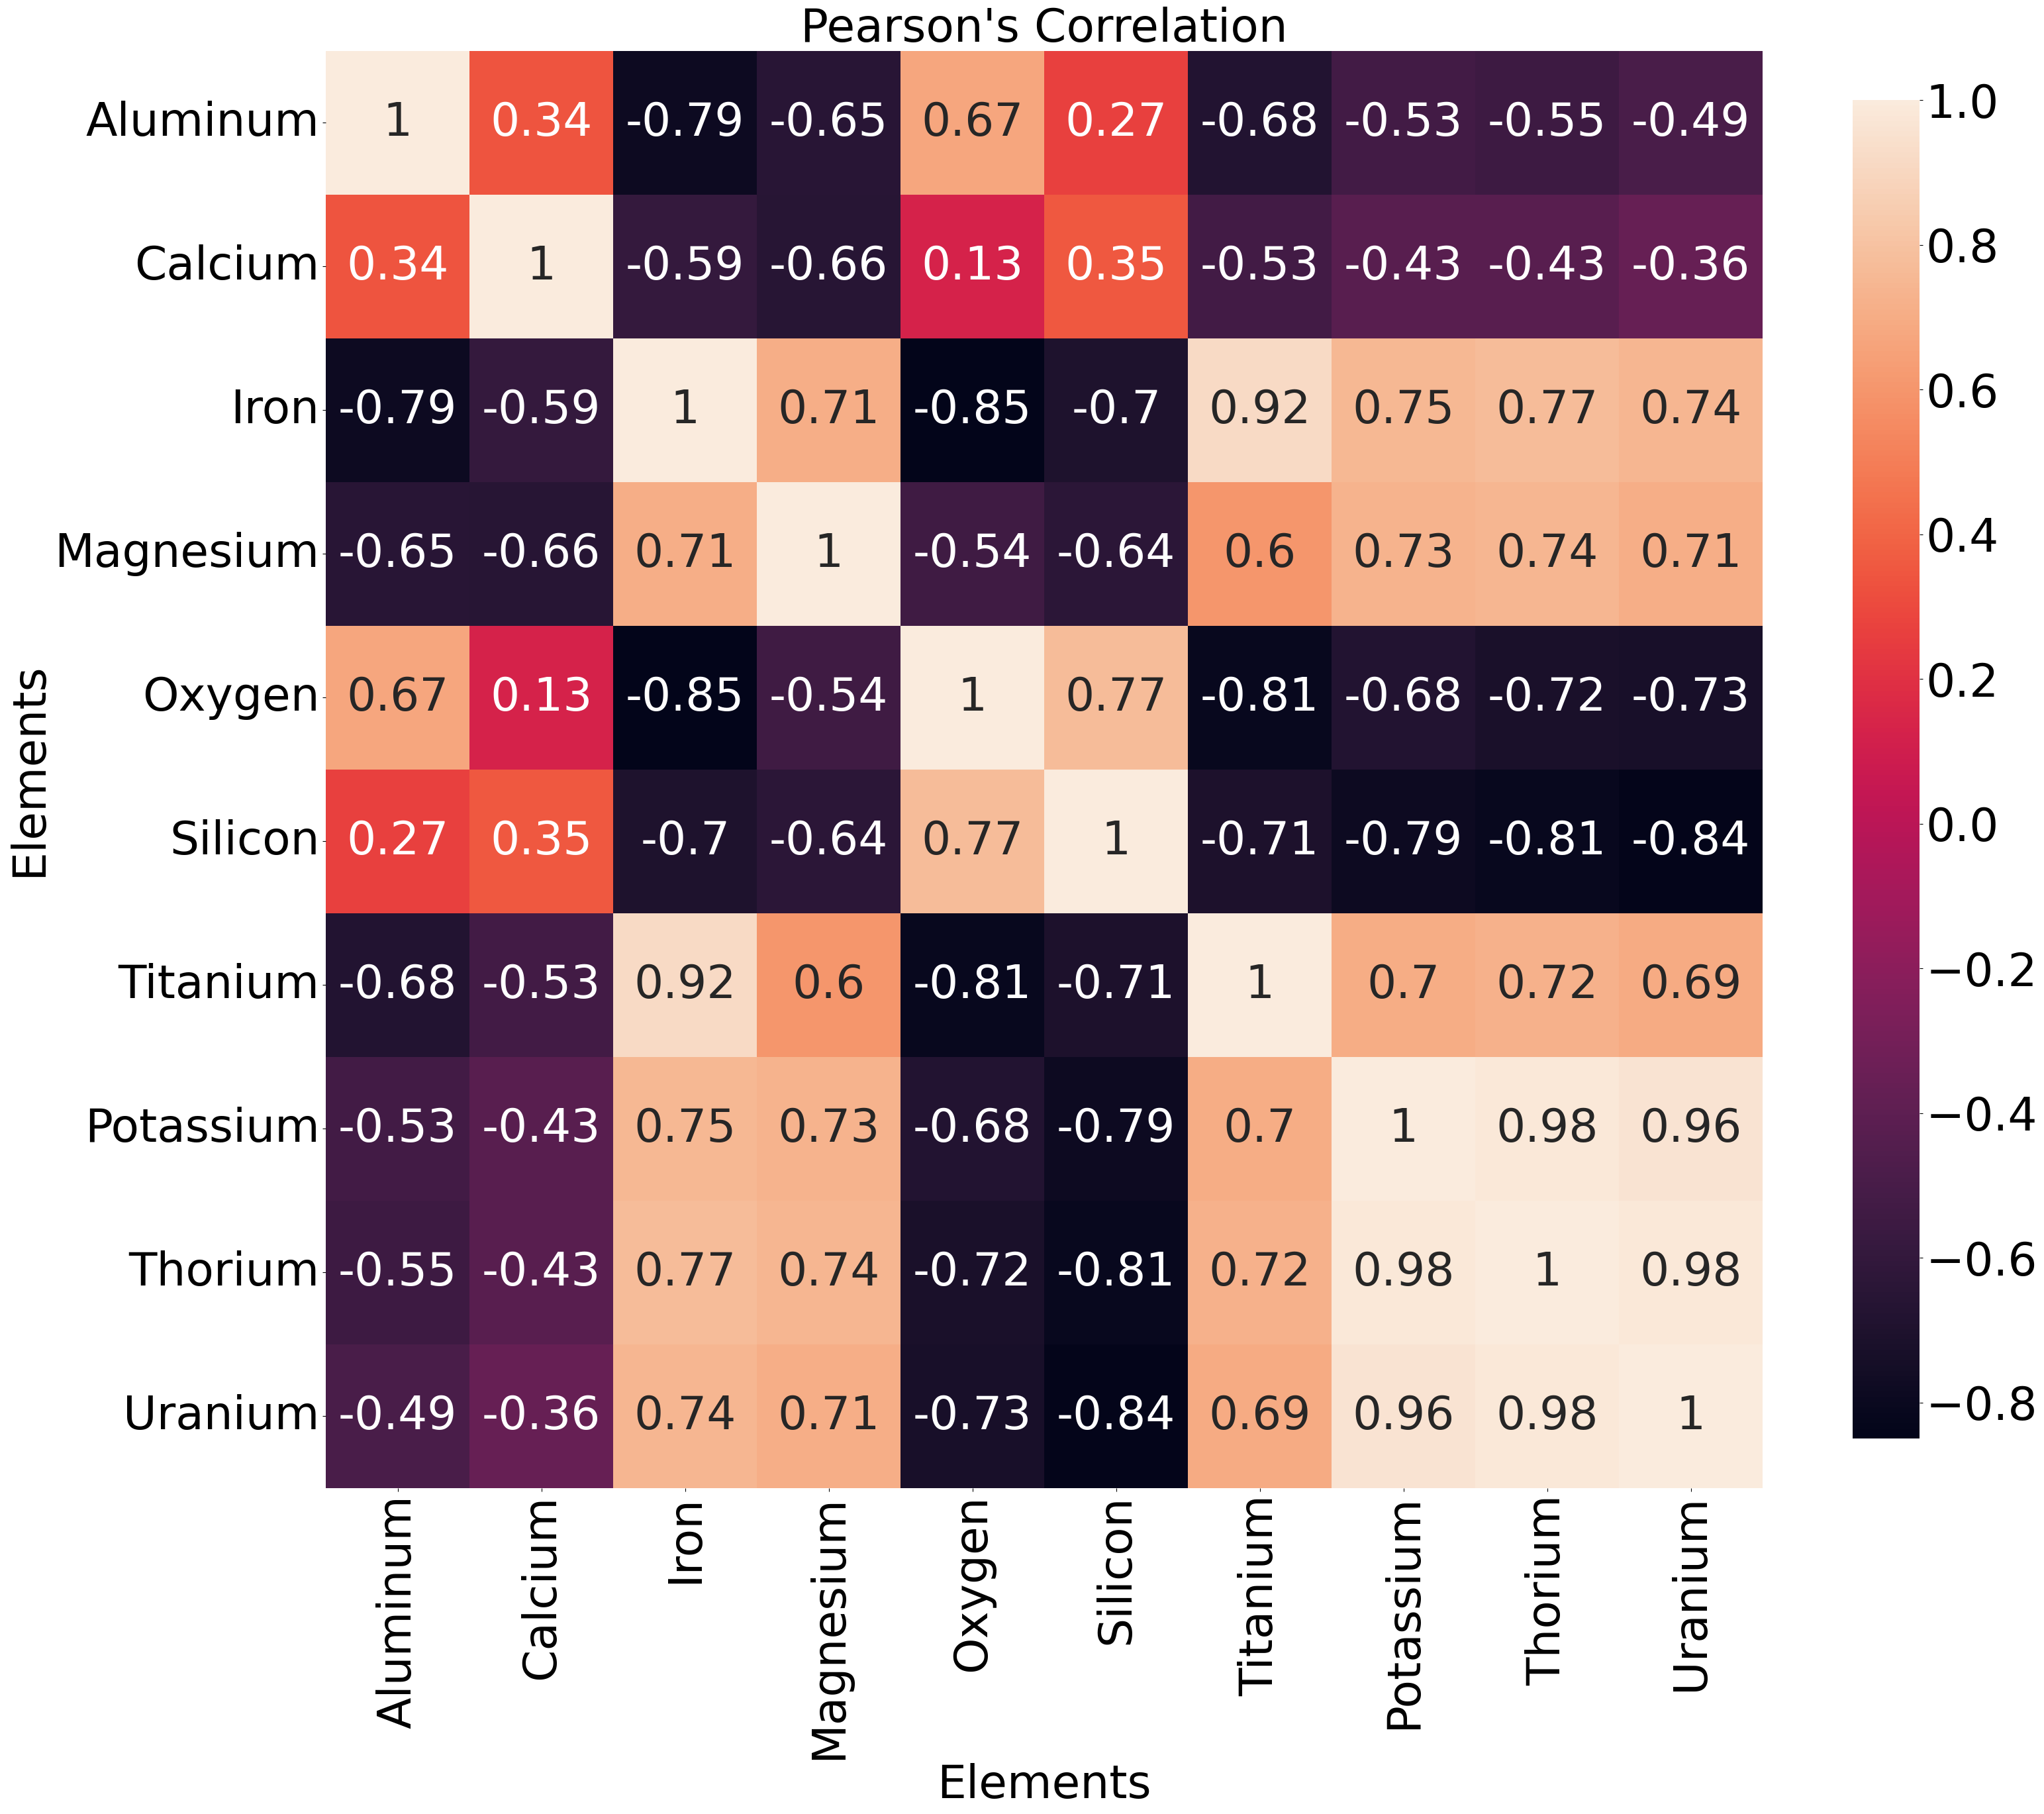

In [99]:
#import seaborn and pyplot
import seaborn as sns
import matplotlib.pyplot as plt

#create and annotate the figure
figure,axis=plt.subplots(figsize=(35,35))
axis.set_title("Pearson's Correlation",fontsize=50)
#create a list of ticks for the color bar
tickPositions=np.arange(-1,1.1,0.2)
#plot the similarity matrix rounded to two decimal places
heatmap=sns.heatmap(np.round(pearsonsCorr,2),
                    square=True,
                    annot=True,
                    xticklabels=allElementNames,
                    yticklabels=allElementNames,
                    annot_kws={"fontsize":50},
                    cbar_kws={"shrink":0.75,
                              "ticks":tickPositions})
#change the fontsize of the tick labels
temp=heatmap.set_yticklabels(heatmap.get_yticklabels(),size=50,rotation=0)
temp=heatmap.set_xticklabels(heatmap.get_xticklabels(),size=50,rotation=90)

#change the colorbar's label's size
cbar=axis.collections[0].colorbar
cbar.ax.tick_params(labelsize=50)
#additional annnotation set axis labels
axis.set_xlabel("Elements",fontsize=50)
axis.set_ylabel("Elements",fontsize=50)